In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [58]:
file_path = r'C:\Users\DT USER\Downloads\BostonHousing.csv'
data = pd.read_csv(file_path)


In [59]:
print(data.head(10))

      crim    zn  indus  chas    nox     rm    age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222     18.7   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222     18.7   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311     15.2   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311     15.2   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311     15.2   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311     15.2   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.6

In [60]:
print(data.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [61]:
target_column = 'medv'

In [62]:
feature_columns = [col for col in data.columns if col != target_column]

In [63]:
X = data[feature_columns]
y = data[target_column]

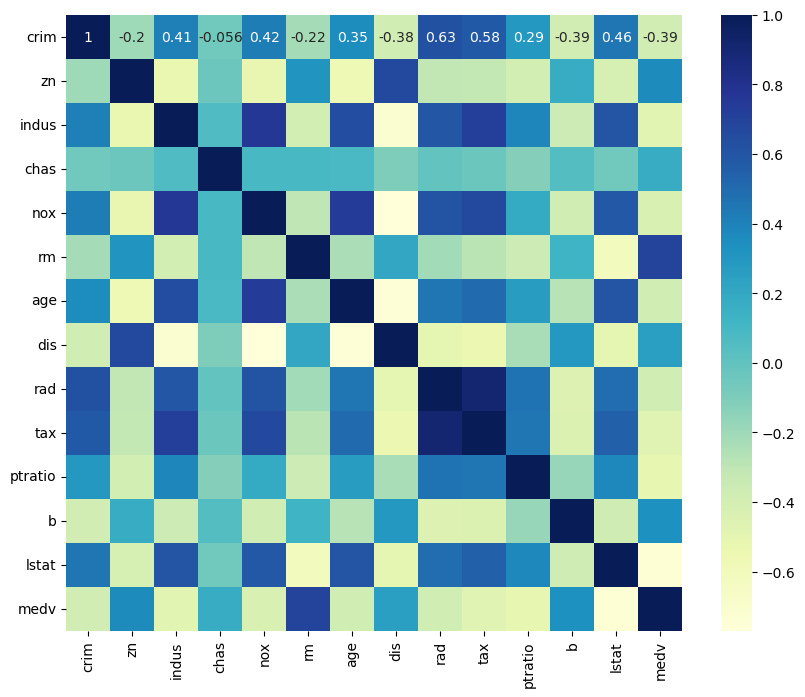

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
correlations = data.corr() 
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, square=True, cmap="YlGnBu", annot=True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [67]:
y_pred = model.predict(X_test)

In [68]:
print("\nModel evaluation:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")


Model evaluation:
Mean Squared Error: 24.291119474973613
R-squared: 0.6687594935356307


In [69]:
def predict_house_price():
    feature_info = {
        'crim': 'per capita crime rate by town (range: 0 to 100)',
        'zn': 'proportion of residential land zoned for lots over 25,000 sq. ft. (range: 0 to 100)',
        'indus': 'proportion of non-retail business acres per town (range: 0 to 30)',
        'chas': 'Charles River dummy variable (0 = not bounded, 1 = bounded)',
        'nox': 'nitric oxides concentration (parts per 10 million) (range: 0.3 to 0.9)',
        'rm': 'average number of rooms per dwelling (range: 3 to 9)',
        'age': 'proportion of owner-occupied units built prior to 1940 (range: 0 to 100)',
        'dis': 'weighted distances to five Boston employment centers (range: 1 to 12)',
        'rad': 'index of accessibility to radial highways (range: 1 to 24)',
        'tax': 'full-value property-tax rate per $10,000 (range: 180 to 720)',
        'ptratio': 'pupil-teacher ratio by town (range: 12 to 22)',
        'b': '1000(Bk - 0.63)^2 where Bk is the proportion of Black residents (range: 0 to 400)',
        'lstat': 'percentage of lower status of the population (range: 2 to 38)'
    }
    user_input = []

    print("Please enter the following values for the house:")
    for feature, description in feature_info.items():
        value = float(input(f"Enter value for {feature} ({description}): "))
        user_input.append(value)
    input_data = np.array(user_input).reshape(1, -1)
    predicted_price = model.predict(input_data)
    print(f"\nPredicted House Price: ${predicted_price[0] * 1000:.2f}")
predict_house_price()

Please enter the following values for the house:


Enter value for crim (per capita crime rate by town (range: 0 to 100)):  13
Enter value for zn (proportion of residential land zoned for lots over 25,000 sq. ft. (range: 0 to 100)):  12
Enter value for indus (proportion of non-retail business acres per town (range: 0 to 30)):  13
Enter value for chas (Charles River dummy variable (0 = not bounded, 1 = bounded)):  1
Enter value for nox (nitric oxides concentration (parts per 10 million) (range: 0.3 to 0.9)):  0.5
Enter value for rm (average number of rooms per dwelling (range: 3 to 9)):  6
Enter value for age (proportion of owner-occupied units built prior to 1940 (range: 0 to 100)):  13
Enter value for dis (weighted distances to five Boston employment centers (range: 1 to 12)):  12
Enter value for rad (index of accessibility to radial highways (range: 1 to 24)):  12
Enter value for tax (full-value property-tax rate per $10,000 (range: 180 to 720)):  190
Enter value for ptratio (pupil-teacher ratio by town (range: 12 to 22)):  13
Enter 


Predicted House Price: $13021.65


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [70]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [74]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [77]:
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

LinearRegression()

In [78]:
y_pred_scaled = model_scaled.predict(X_test_scaled)

In [79]:
print("\nModel evaluation:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_scaled)}")
print(f"R-squared: {r2_score(y_test, y_pred_scaled)}")


Model evaluation:
Mean Squared Error: 24.291119474973495
R-squared: 0.6687594935356322


In [81]:
def predict_house_price():
    feature_info = {
        'crim': 'per capita crime rate by town (range: 0 to 100)',
        'zn': 'proportion of residential land zoned for lots over 25,000 sq. ft. (range: 0 to 100)',
        'indus': 'proportion of non-retail business acres per town (range: 0 to 30)',
        'chas': 'Charles River dummy variable (0 = not bounded, 1 = bounded)',
        'nox': 'nitric oxides concentration (parts per 10 million) (range: 0.3 to 0.9)',
        'rm': 'average number of rooms per dwelling (range: 3 to 9)',
        'age': 'proportion of owner-occupied units built prior to 1940 (range: 0 to 100)',
        'dis': 'weighted distances to five Boston employment centers (range: 1 to 12)',
        'rad': 'index of accessibility to radial highways (range: 1 to 24)',
        'tax': 'full-value property-tax rate per $10,000 (range: 180 to 720)',
        'ptratio': 'pupil-teacher ratio by town (range: 12 to 22)',
        'b': '1000(Bk - 0.63)^2 where Bk is the proportion of Black residents (range: 0 to 400)',
        'lstat': 'percentage of lower status of the population (range: 2 to 38)'
    }
    user_input = []

    print("Please enter the following values for the house:")
    for feature, description in feature_info.items():
        value = float(input(f"Enter value for {feature} ({description}): "))
        user_input.append(value)
    input_data = np.array(user_input).reshape(1, -1)
    predicted_price = model_scaled.predict(input_data)
    print(f"\nPredicted House Price: ${predicted_price[0] * 1000:.2f}")
predict_house_price()

Please enter the following values for the house:


Enter value for crim (per capita crime rate by town (range: 0 to 100)):  13
Enter value for zn (proportion of residential land zoned for lots over 25,000 sq. ft. (range: 0 to 100)):  12
Enter value for indus (proportion of non-retail business acres per town (range: 0 to 30)):  13
Enter value for chas (Charles River dummy variable (0 = not bounded, 1 = bounded)):  1
Enter value for nox (nitric oxides concentration (parts per 10 million) (range: 0.3 to 0.9)):  0.5
Enter value for rm (average number of rooms per dwelling (range: 3 to 9)):  6
Enter value for age (proportion of owner-occupied units built prior to 1940 (range: 0 to 100)):  13
Enter value for dis (weighted distances to five Boston employment centers (range: 1 to 12)):  12
Enter value for rad (index of accessibility to radial highways (range: 1 to 24)):  12
Enter value for tax (full-value property-tax rate per $10,000 (range: 180 to 720)):  190
Enter value for ptratio (pupil-teacher ratio by town (range: 12 to 22)):  13
Enter 


Predicted House Price: $-191314.64


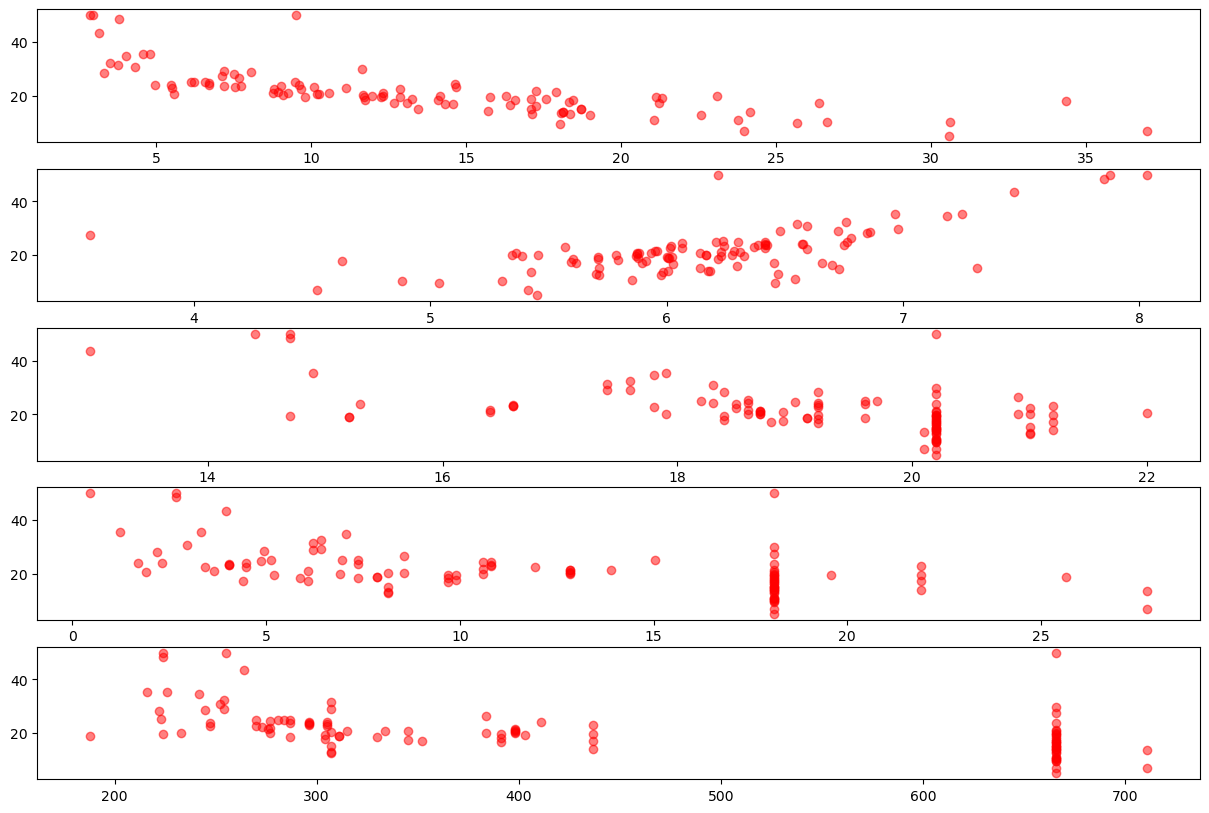

In [82]:
plt.figure(figsize=(15, 10))
correlations = X_train.corrwith(y_train).abs().sort_values(ascending=False)
top_features = correlations.index[:5]
for i, feature in enumerate(top_features):
    plt.subplot(len(top_features), 1, i + 1)
    plt.scatter(X_test[feature], y_test, color='red', label='Actual values', alpha=0.5)

In [83]:
correlations = X_train.corrwith(y_train).abs().sort_values(ascending=False)
top_features = correlations.index[:5]

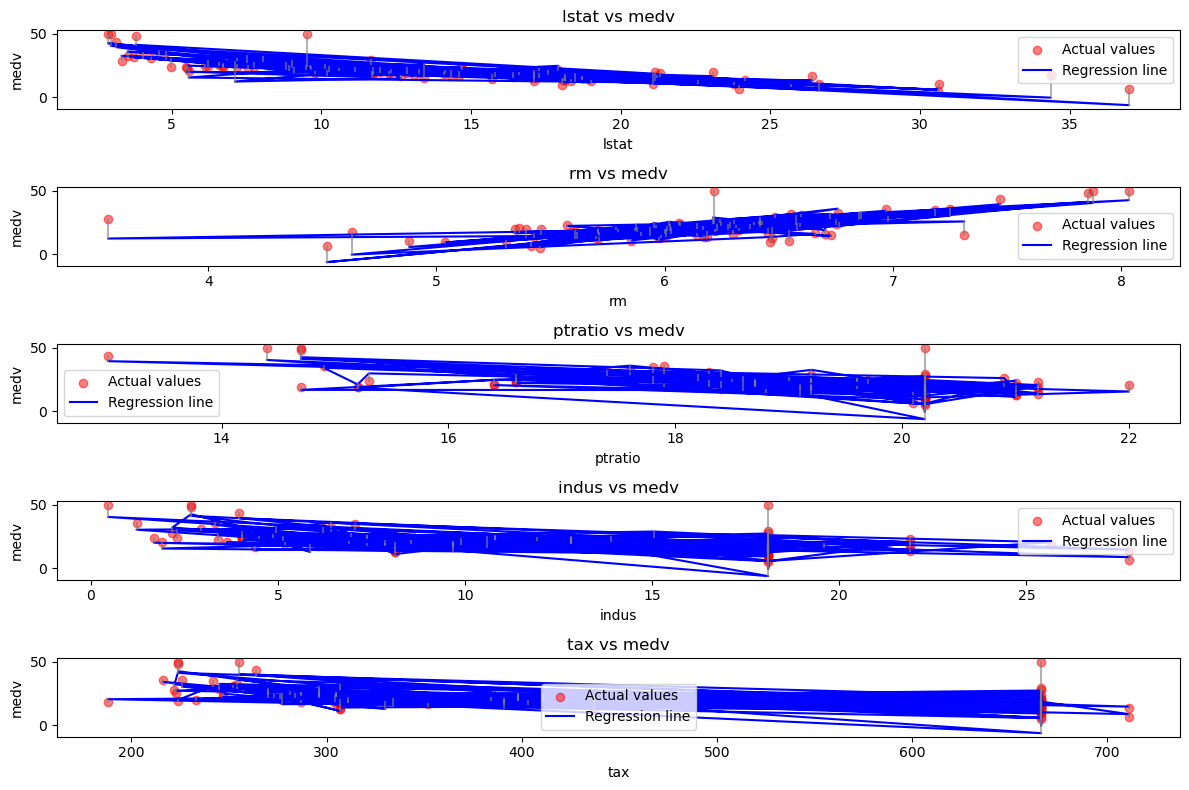

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

for i, feature in enumerate(top_features):
    plt.subplot(len(top_features), 1, i + 1)
    plt.scatter(X_test[feature], y_test, color='red', label='Actual values', alpha=0.5)
    plt.plot(X_test[feature], y_pred, color='blue', label='Regression line')
    for x, actual, predicted in zip(X_test[feature], y_test, y_pred):
        plt.plot([x, x], [actual, predicted], color='gray', alpha=0.6)
    plt.xlabel(feature)
    plt.ylabel(target_column)
    plt.title(f'{feature} vs {target_column}')
    plt.legend()

plt.tight_layout()
plt.show()
